# 01 - Exploração de Dados (EDA) — Brasileirão Série A 2003–2024

Este notebook é responsável pela análise exploratória inicial do dataset. Atualize a variável `DATA_CSV_PATH` com o caminho para o CSV baixado do Kaggle.

Ele inclui:
- Carregamento dos dados
- Checagem de colunas, tipos e missing
- Estatísticas descritivas
- Distribuição de gols por time/temporada
- Heatmap de correlação
- Análise mandante vs visitante
- Sugestões de feature engineering


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 160)
plt.rcParams['figure.figsize'] = (10,6)

DATA_CSV_PATH = 'brasileirao.csv'
print('Notebook carregado.')

Notebook carregado.


In [3]:
#Carregamento
df = pd.read_csv(DATA_CSV_PATH)
print('Shape:', df.shape)
df.head()

Shape: (450, 11)


,season,place,team,points,played,won,draw,loss,goals,goals_taken,goals_diff
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55
1,2003,2,Santos,87,46,25,12,9,93,60,33
2,2003,3,São Paulo,78,46,22,12,12,81,67,14
3,2003,4,São Caetano,74,46,19,14,13,53,37,16
4,2003,5,Coritiba,73,46,21,10,15,67,58,9


In [4]:
#Tipos de dados e valores ausentes
print(df.dtypes)
print('\nValores ausentes:')
df.isna().sum().sort_values(ascending=False).head(20)

season          int64
place           int64
team           object
points          int64
played          int64
won             int64
draw            int64
loss            int64
goals           int64
goals_taken     int64
goals_diff      int64
dtype: object

Valores ausentes:


season         0
place          0
team           0
points         0
played         0
won            0
draw           0
loss           0
goals          0
goals_taken    0
goals_diff     0
dtype: int64

In [5]:
#Estatísticas descritivas para colunas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,450.0,2013.284444,6.442411,2003.0,2008.0,2013.0,2019.00,2024.0
place,450.0,10.762222,5.970148,1.0,6.0,11.0,16.00,24.0
points,450.0,53.331111,12.748524,15.0,45.0,53.0,61.00,100.0
played,450.0,39.044444,2.556755,37.0,38.0,38.0,38.00,46.0
won,450.0,14.362222,4.383091,1.0,11.0,14.0,17.00,31.0
draw,450.0,10.315556,2.623855,3.0,8.0,10.0,12.00,18.0
loss,450.0,14.366667,4.403506,3.0,11.0,14.0,17.00,29.0
goals,450.0,50.031111,12.788459,18.0,41.0,49.0,58.00,103.0
goals_taken,450.0,50.044444,12.446868,19.0,41.0,48.0,58.00,92.0
goals_diff,450.0,-0.013333,16.605331,-57.0,-10.0,-1.0,10.75,55.0


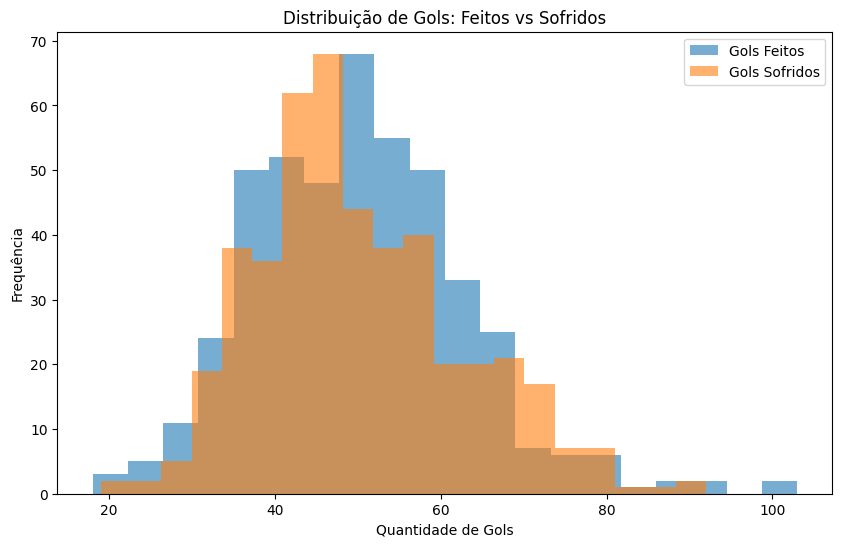

In [14]:
#Gols feitos vs sofridos
plt.hist(df['goals'], bins=20, alpha=0.6, label='Gols Feitos')
plt.hist(df['goals_taken'], bins=20, alpha=0.6, label='Gols Sofridos')
plt.title('Distribuição de Gols: Feitos vs Sofridos')
plt.xlabel('Quantidade de Gols')
plt.ylabel('Frequência')
plt.legend()
plt.show()


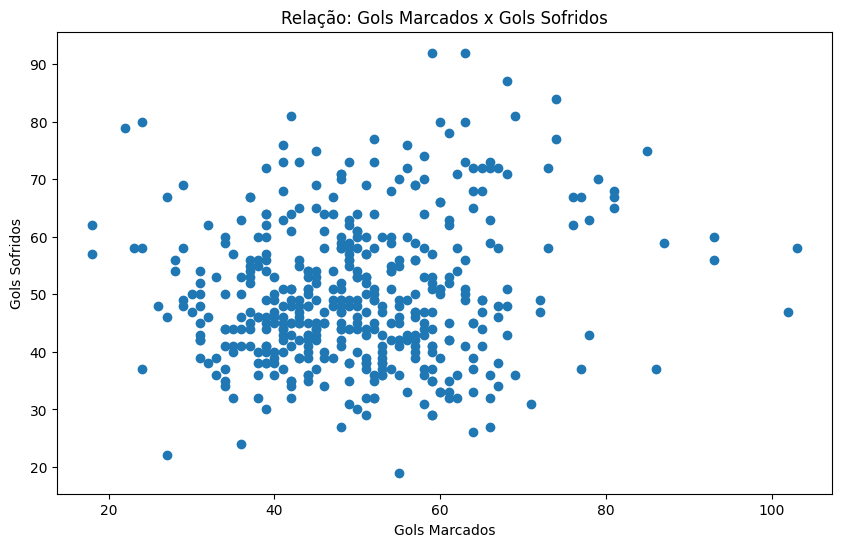

In [16]:
#Comparação em scatterplot
plt.scatter(df['goals'], df['goals_taken'])
plt.title('Relação: Gols Marcados x Gols Sofridos')
plt.xlabel('Gols Marcados')
plt.ylabel('Gols Sofridos')
plt.show()

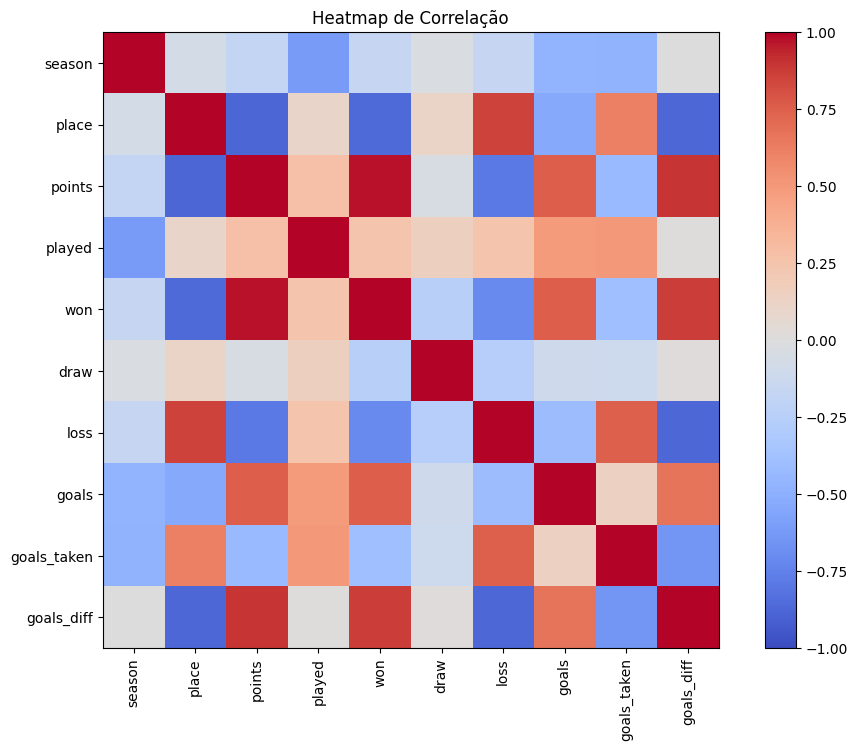

In [7]:
#Heatmap de correlação numérica
num = df.select_dtypes(include=[np.number])
if num.shape[1] > 1:
    corr = num.corr()
    plt.figure(figsize=(12,8))
    plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.colorbar()
    plt.title('Heatmap de Correlação')
    plt.show()

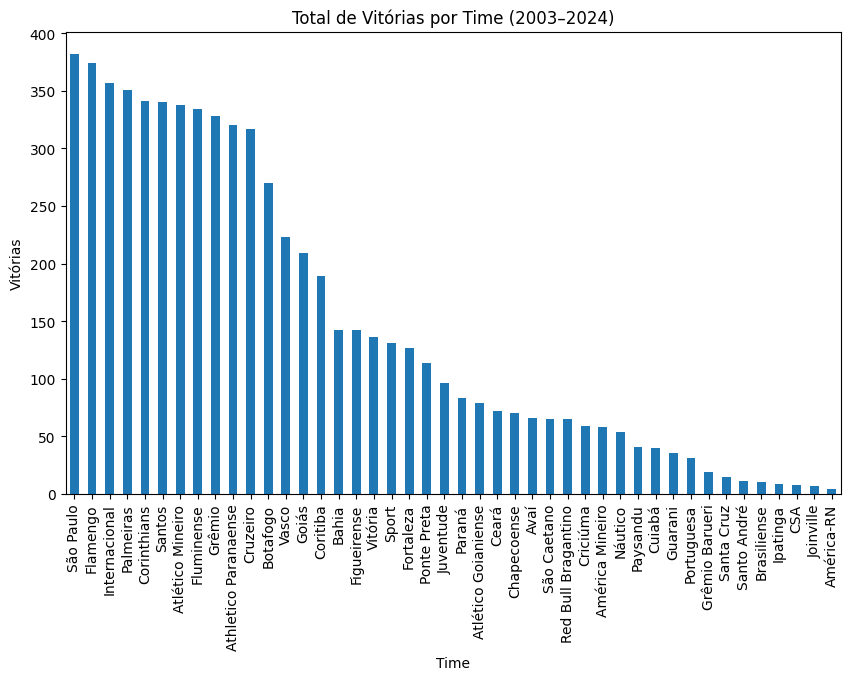

In [ ]:
#Total de vitórias mandantes e visitantes
win_counts = df.groupby('team')['won'].sum().sort_values(ascending=False)

win_counts.plot(kind='bar')
plt.title('Total de Vitórias por Time (2003–2024)')
plt.ylabel('Vitórias')
plt.xlabel('Time')
plt.show()
